<a href="https://colab.research.google.com/github/Mirabelljoicelaura/MACHINE-LEARNING/blob/main/Week11/Week11_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mirabell Joice Laura

Kelas : D4 Teknik Informatika / 3D

NIM : 2141720174

#TUGAS


###Nomor 1
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

####Import Library

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

####Unduh Dataset

In [13]:
# Langkah 2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


####Normalisasi dan One-Hot Encoding

In [14]:
# Langkah 3
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

####Split Data

In [15]:
# Langkah 4
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

####Membuat Model CNN

In [16]:
# Fungsi Model CNN
def cnn_model():
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()
    return model

####Augmentasi Data

In [17]:
# Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

####Inisialisasi dan Kompilasi Model

In [18]:
# Inisialisasi dan Kompilasi Model
model = cnn_model()
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)        

####Latih Model

In [19]:
# Pelatihan Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=50,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/50
625/625 [==============================] - 47s 53ms/step - loss: 2.1718 - accuracy: 0.1866 - val_loss: 1.7896 - val_accuracy: 0.3024
Epoch 2/50
625/625 [==============================] - 32s 52ms/step - loss: 1.7470 - accuracy: 0.3471 - val_loss: 1.5028 - val_accuracy: 0.4432
Epoch 3/50
625/625 [==============================] - 31s 50ms/step - loss: 1.5400 - accuracy: 0.4417 - val_loss: 1.3225 - val_accuracy: 0.5187
Epoch 4/50
625/625 [==============================] - 31s 50ms/step - loss: 1.4112 - accuracy: 0.5026 - val_loss: 1.1518 - val_accuracy: 0.6003
Epoch 5/50
625/625 [==============================] - 32s 51ms/step - loss: 1.3051 - accuracy: 0.5525 - val_loss: 1.2943 - val_accuracy: 0.5783
Epoch 6/50
625/625 [==============================] - 32s 51ms/step - loss: 1.2238 - accuracy: 0.5865 - val_loss: 1.0701 - val_accuracy: 0.6309
Epoch 7/50
625/625 [==============================] - 32s 51ms/step - loss: 1.1715 - accuracy: 0.6111 - val_loss: 0.9468 - val_accuracy:

####Cetak Hasil Akurasi

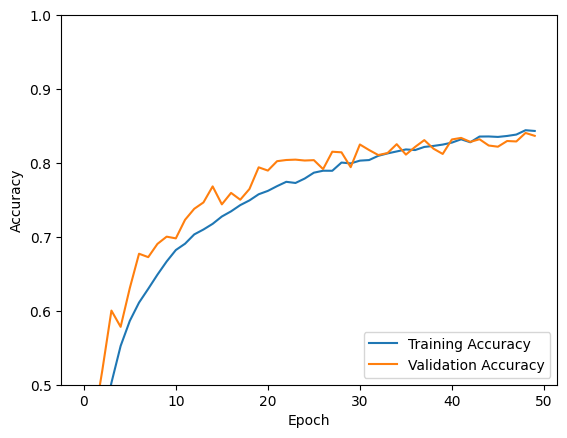

313/313 - 2s - loss: 0.6802 - accuracy: 0.8326 - 2s/epoch - 5ms/step
Test Accuracy: 0.8325999975204468


In [21]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')

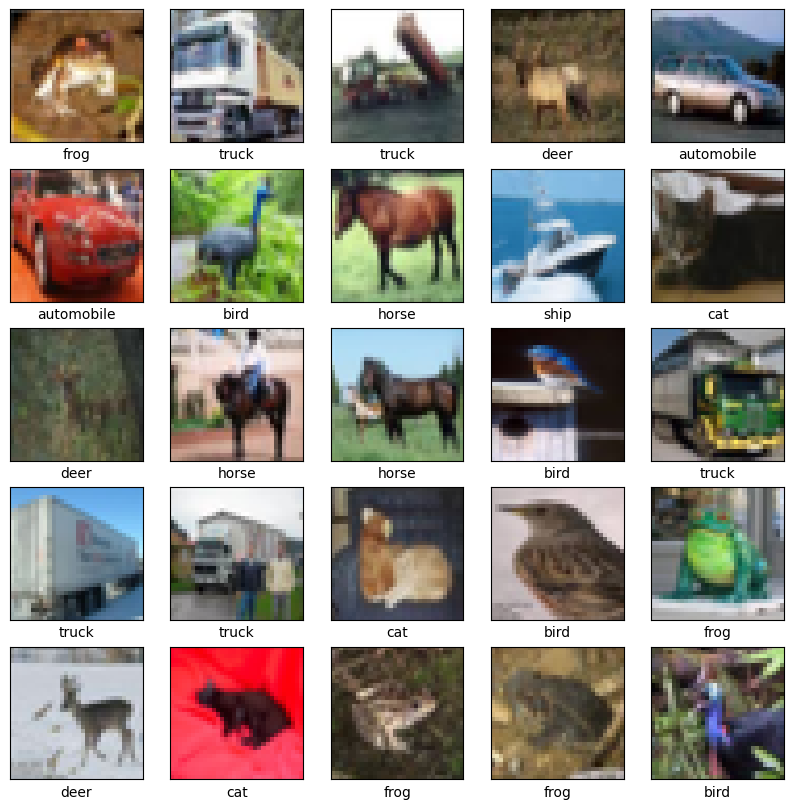

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(train_images[i])
   # The CIFAR labels happen to be arrays,
   # which is why you need the extra index
   plt.xlabel(class_names[train_labels[i][0]])
plt.show()

1/1 [==============================] - 0s 26ms/step


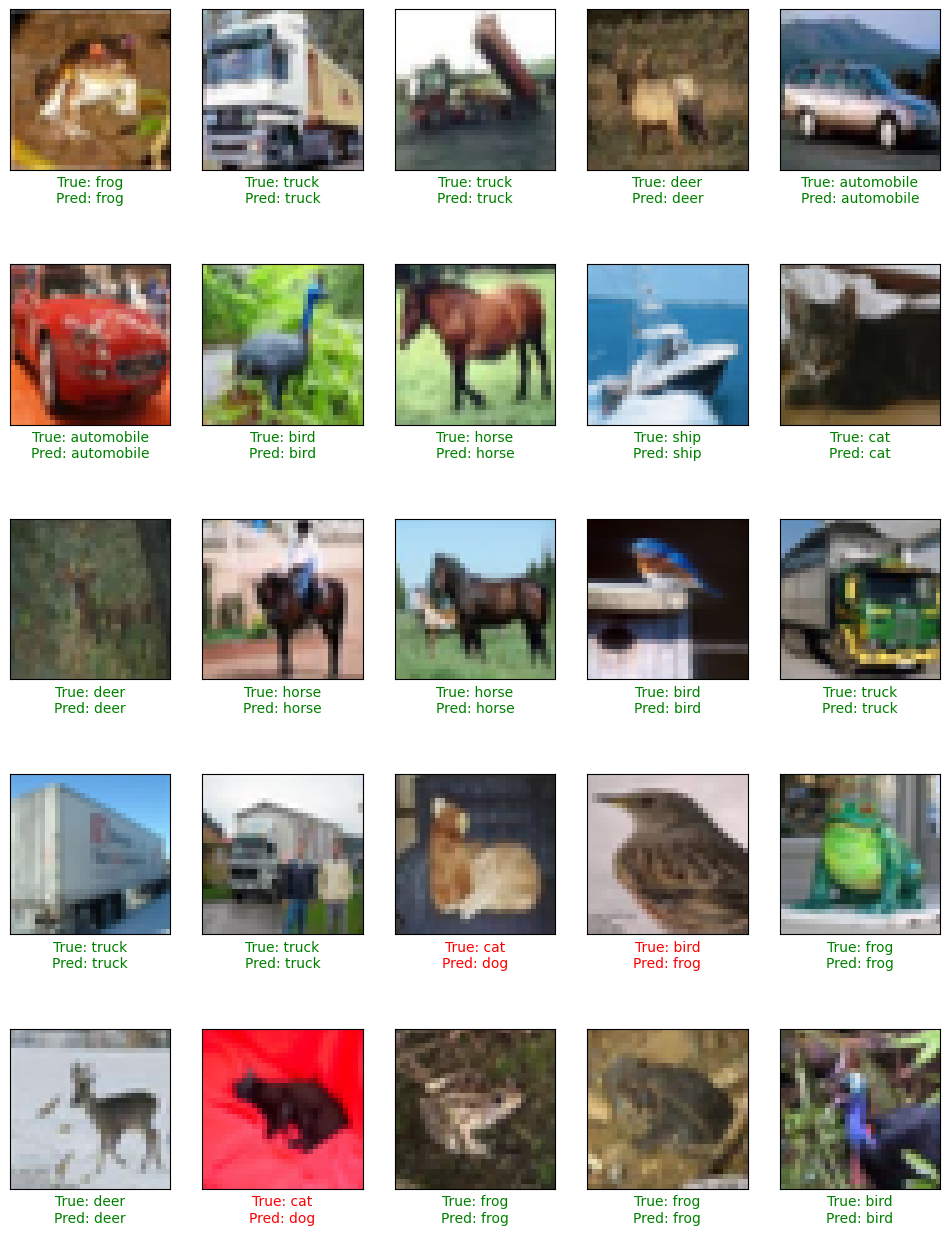

In [31]:
import numpy as np

# Menggunakan model untuk melakukan prediksi
predictions = model.predict(train_images[:25])

# Mengubah prediksi menjadi indeks kelas dengan nilai tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Tampilkan hasil prediksi
plt.figure(figsize=(12, 16))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    true_label = class_names[train_labels[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f'True: {true_label}\nPred: {predicted_label}', color=color)
plt.show()
